In [104]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from cardata import bmws,priuses

In [105]:
def miles(car):
    return car[3]

def price(car):
    return car[4]

def year(car):
    return car[2]

def get_cars_years(make,model,years):
    return set([car for car in get_cars(make,model,year) for year in years])

In [106]:
def plot_function(f,xmin,xmax,**kwargs):
    ts = np.linspace(xmin,xmax,1000)
    plt.plot(ts,[f(t) for t in ts],**kwargs)

In [121]:
def scalar_field_heatmap(f,xmin,xmax,ymin,ymax,xsteps=100,ysteps=100):
    fig = plt.figure()
    fig.set_size_inches(7,7)

    fv = np.vectorize(f)

    X = np.linspace(xmin, xmax, xsteps)
    Y = np.linspace(ymin, ymax, ysteps)
    X, Y = np.meshgrid(X, Y)
    
    # https://stackoverflow.com/a/54088910/1704140
    z = fv(X,Y)
    
#     # x and y are bounds, so z should be the value *inside* those bounds.
#     # Therefore, remove the last value from the z array.
#     z = z[:-1, :-1]
#     z_min, z_max = -z.min(), z.max()

    fig, ax = plt.subplots()

    c = ax.pcolormesh(X,Y,z, cmap='plasma')
    # set the limits of the plot to the limits of the data
    ax.axis([X.min(), X.max(), Y.min(), Y.max()])

    fig.colorbar(c, ax=ax)
    
def plot_scalar_field(f,xmin,xmax,ymin,ymax,xsteps=100,ysteps=100,c=None,cmap=cm.coolwarm,alpha=1,antialiased=False, zorder=0):
    fig = plt.gcf()
    fig.set_size_inches(7,7)
    ax = fig.gca(projection='3d')

    fv = np.vectorize(f)
    
    # Make data.
    X = np.linspace(xmin, xmax, xsteps)
    Y = np.linspace(ymin, ymax, ysteps)
    X, Y = np.meshgrid(X, Y)
    Z = fv(X,Y)

    # Plot the surface.
    surf = ax.plot_surface(X, Y, Z, cmap=cmap,color=c,alpha=alpha,
                           linewidth=0, antialiased=antialiased, zorder=zorder)

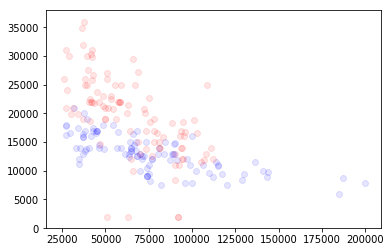

In [10]:
plt.scatter(list(map(miles,priuses)),list(map(price,priuses)),c='b',alpha=0.1)
plt.scatter(list(map(miles,bmws)),list(map(price,bmws)),c='r',alpha=0.1)

In [11]:
from math import exp
def sigmoid(x):
    return 1 / (1+exp(-x))

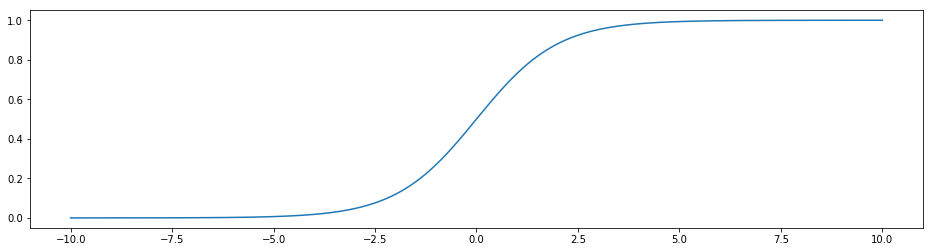

In [12]:
plot_function(sigmoid,-10,10)
plt.gcf().set_size_inches(16,4)

In [13]:
prius_raw_prices = [p[4] for p in priuses]
prius_raw_mileages = [p[3] for p in priuses]
bmw_raw_prices = [bmw[4] for bmw in bmws]
bmw_raw_mileages = [bmw[3] for bmw in bmws]

In [19]:
def bmw_finder(mileage,price):
    if price > 25000:
        return 1
    else:
        return 0

In [20]:
bmws

[('bmw', '5', 2013.0, 93404.0, 13999.0, 22.09145859494213),
 ('bmw', '5', 2013.0, 110890.0, 13995.0, 22.216458611342592),
 ('bmw', '5', 2013.0, 94133.0, 13982.0, 22.09145862741898),
 ('bmw', '5', 2013.0, 46778.0, 14599.0, 22.217153096608797),
 ('bmw', '5', 2013.0, 53106.0, 22500.0, 22.09215310892361),
 ('bmw', '5', 2013.0, 58761.0, 24998.0, 22.092153121840276),
 ('bmw', '5', 2013.0, 108816.0, 24947.0, 22.133819800694443),
 ('bmw', '5', 2013.0, 81100.0, 13995.0, 22.092847590439813),
 ('bmw', '5', 2013.0, 90000.0, 8400.0, 1.5456253721759259),
 ('bmw', '5', 2013.0, 68613.0, 14995.0, 22.134514275960647),
 ('bmw', '5', 2013.0, 94000.0, 11995.0, 1.4428476133564814),
 ('bmw', '5', 2013.0, 92500.0, 10995.0, 22.092847621446758),
 ('bmw', '5', 2013.0, 112081.0, 11995.0, 22.217847629456017),
 ('bmw', '5', 2013.0, 105121.0, 11500.0, 22.092847637488426),
 ('bmw', '5', 2013.0, 92000.0, 2013.0, 2.2039587605555555),
 ('bmw', '5', 2013.0, 107953.0, 12999.0, 22.094930986747684),
 ('bmw', '5', 2013.0, 56

In [21]:
all_car_data = []
for bmw in bmws:
    all_car_data.append((bmw[3],bmw[4],1))
for prius in priuses:
    all_car_data.append((prius[3],prius[4],0))

In [22]:
all_car_data

[(93404.0, 13999.0, 1),
 (110890.0, 13995.0, 1),
 (94133.0, 13982.0, 1),
 (46778.0, 14599.0, 1),
 (53106.0, 22500.0, 1),
 (58761.0, 24998.0, 1),
 (108816.0, 24947.0, 1),
 (81100.0, 13995.0, 1),
 (90000.0, 8400.0, 1),
 (68613.0, 14995.0, 1),
 (94000.0, 11995.0, 1),
 (92500.0, 10995.0, 1),
 (112081.0, 11995.0, 1),
 (105121.0, 11500.0, 1),
 (92000.0, 2013.0, 1),
 (107953.0, 12999.0, 1),
 (56000.0, 18995.0, 1),
 (101191.0, 18900.0, 1),
 (64365.0, 16998.0, 1),
 (66000.0, 10000.0, 1),
 (76675.0, 12500.0, 1),
 (93015.0, 15995.0, 1),
 (80917.0, 14970.0, 1),
 (96000.0, 16795.0, 1),
 (70000.0, 12999.0, 1),
 (107000.0, 11950.0, 1),
 (78000.0, 18995.0, 1),
 (78000.0, 15000.0, 1),
 (92000.0, 2013.0, 1),
 (57624.0, 21963.0, 1),
 (77854.0, 16995.0, 1),
 (48310.0, 22998.0, 1),
 (51656.0, 20998.0, 1),
 (62410.0, 19991.0, 1),
 (39332.0, 29995.0, 1),
 (31420.0, 21000.0, 1),
 (41267.0, 22450.0, 1),
 (73000.0, 19999.0, 1),
 (94608.0, 11995.0, 1),
 (67000.0, 24964.0, 1),
 (50000.0, 18985.0, 1),
 (73601.0, 1

In [27]:
def test_classifier(classifier, data):
    trues = 0
    falses = 0
    for mileage, price, is_bmw in data:
        if classifier(mileage, price) == is_bmw:
            trues += 1
        else:
            falses += 1
    return trues / (trues + falses)

def test_classifier(classifier, data):
    true_positives = 0
    true_negatives = 0
    false_positives = 0
    false_negatives = 0
    for mileage, price, is_bmw in data:
        predicted = classifier(mileage,price)
        if predicted and is_bmw:
            true_positives += 1
        elif predicted:
            false_positives += 1
        elif is_bmw:
            false_negatives += 1
        else:
            true_negatives += 1
            
    print("true positives %f" % true_positives)
    print("true negatives %f" % true_negatives)
    print("false positives %f" % false_positives)
    print("false negatives %f" % false_negatives)
            
    return (true_positives + true_negatives) / len(data)

In [28]:
test_classifier(bmw_finder, all_car_data)

true positives 18.000000
true negatives 100.000000
false positives 0.000000
false negatives 82.000000


0.59

In [29]:
def bmw_finder2(mileage,price):
    if price > 20000:
        return 1
    else:
        return 0

In [31]:
test_classifier(bmw_finder2, all_car_data)

true positives 48.000000
true negatives 99.000000
false positives 1.000000
false negatives 52.000000


0.735

In [178]:
def plot_data(ds,white=False):
    if white:
        c1,c2 = 'w','w'
    else:    
        c1,c2 = 'C1','C0'
    plt.scatter([d[0] for d in ds if d[2]==0],[d[1] for d in ds if d[2]==0],c=c1)
    plt.scatter([d[0] for d in ds if d[2]==1],[d[1] for d in ds if d[2]==1],c=c2,marker='x')


Text(0,0.5,'Price ($)')

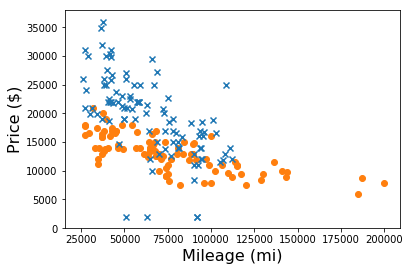

In [149]:
plot_data(all_car_data)
plt.xlabel('Mileage (mi)',fontsize=16)
plt.ylabel('Price ($)',fontsize=16)

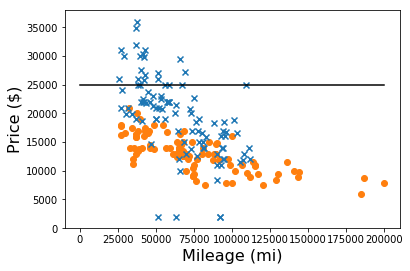

In [150]:
plot_data(all_car_data)
plt.xlabel('Mileage (mi)',fontsize=16)
plt.ylabel('Price ($)',fontsize=16)
plot_function(lambda x:25000,0,200000,c='k')

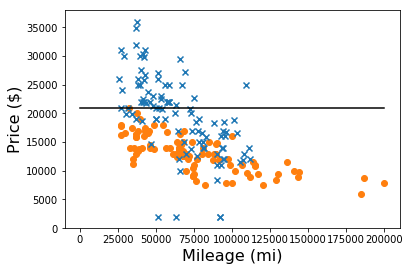

In [151]:
plot_data(all_car_data)
plt.xlabel('Mileage (mi)',fontsize=16)
plt.ylabel('Price ($)',fontsize=16)
plot_function(lambda x:21000,0,200000,c='k')

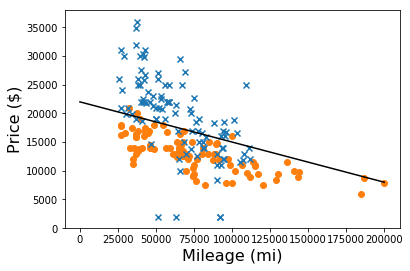

In [152]:
plot_data(all_car_data)
plt.xlabel('Mileage (mi)',fontsize=16)
plt.ylabel('Price ($)',fontsize=16)
plot_function(lambda x:22000-0.07*x,0,200000,c='k')

In [153]:
def decision_boundary_classify(mileage,price):
    if price > 21000 - 0.07 * mileage:
        return 1
    else:
        return 0

In [154]:
test_classifier(decision_boundary_classify, all_car_data)

true positives 73.000000
true negatives 88.000000
false positives 12.000000
false negatives 27.000000


0.805

In [155]:
def make_scale(data):
    min_val = min(data)
    max_val = max(data)
    def scale(x):
        return (x-min_val) / (max_val - min_val)
    def unscale(y):
        return y * (max_val - min_val) + min_val
    return scale, unscale

price_scale, price_unscale = make_scale([x[1] for x in all_car_data])
mileage_scale, mileage_unscale = make_scale([x[0] for x in all_car_data])


In [156]:
scaled_car_data = [(mileage_scale(mileage), price_scale(price), is_bmw) 
                    for mileage,price,is_bmw in all_car_data]

Text(0.5,0,'Mileage')

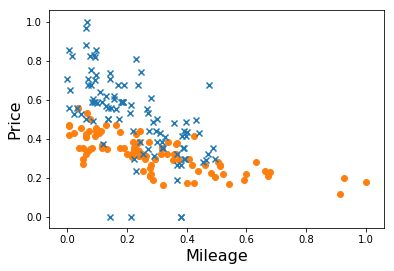

In [157]:
plot_data(scaled_car_data)
plt.ylabel('Price', fontsize=16)
plt.xlabel('Mileage', fontsize=16)

In [158]:
scaled_car_data

[(0.3873793103448276, 0.35276804897430614, 1),
 (0.4878735632183908, 0.35265032227683435, 1),
 (0.39156896551724135, 0.3522677105100509, 1),
 (0.11941379310344828, 0.37042705359507905, 1),
 (0.1557816091954023, 0.6029667127762899, 1),
 (0.1882816091954023, 0.6764870353474409, 1),
 (0.47595402298850575, 0.6749860199546752, 1),
 (0.31666666666666665, 0.35265032227683435, 1),
 (0.367816091954023, 0.18798010418812727, 1),
 (0.2449022988505747, 0.38208199664478915, 1),
 (0.39080459770114945, 0.29378697354092476, 1),
 (0.382183908045977, 0.26435529917296996, 1),
 (0.4947183908045977, 0.29378697354092476, 1),
 (0.4547183908045977, 0.2792182947287871, 1),
 (0.3793103448275862, 0.0, 1),
 (0.4709942528735632, 0.32333637460635134, 1),
 (0.1724137931034483, 0.4998086941166083, 1),
 (0.432132183908046, 0.4970126850516526, 1),
 (0.22048850574712645, 0.44103364040380255, 1),
 (0.22988505747126436, 0.23507078317685492, 1),
 (0.291235632183908, 0.3086499690967419, 1),
 (0.38514367816091954, 0.411513671

In [159]:
21000 - 0.07 * 200000

6999.999999999998

In [160]:
price_scale(21000)

0.5588192012243577

In [161]:
price_scale(7000)

0.14677576007299056

In [162]:
mileage_scale(100000)

0.42528735632183906

In [163]:
0.14677576007299056/0.42528735632183906

0.3451213817932481

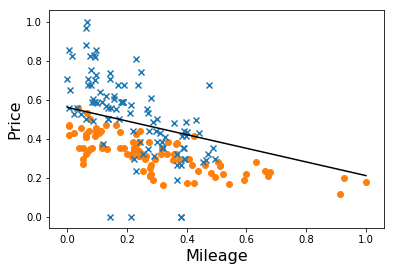

In [164]:
plot_data(scaled_car_data)
plt.ylabel('Price', fontsize=16)
plt.xlabel('Mileage', fontsize=16)
plot_function(lambda x: 0.56-0.35*x,0,1,c='k')

In [165]:
test_classifier(lambda x,p: p>= 0.56-0.35*x, scaled_car_data)

true positives 59.000000
true negatives 98.000000
false positives 2.000000
false negatives 41.000000


0.785

In [166]:
test_classifier(lambda x,p: p>= (price_scale(21000)-(price_scale(7000)*x)/mileage_scale(100000)),scaled_car_data)

true positives 59.000000
true negatives 99.000000
false positives 1.000000
false negatives 41.000000


0.79

In [167]:
def scaled_decision_boundary_classify(mileage,price):
    if price >= 0.56 - 0.35 * mileage:
        return 1
    else:
        return 0

In [168]:
test_classifier(scaled_decision_boundary_classify, scaled_car_data)

true positives 59.000000
true negatives 98.000000
false positives 2.000000
false negatives 41.000000


0.785

<Figure size 504x504 with 0 Axes>

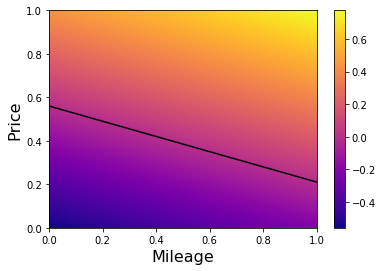

In [169]:
scalar_field_heatmap(lambda x,p: p + 0.35*x - 0.56, 0, 1,0,1)
# plot_data(scaled_car_data,white=True)
plt.ylabel('Price', fontsize=16)
plt.xlabel('Mileage', fontsize=16)
plot_function(lambda x: 0.56-0.35*x,0,1,c='k')

In [170]:
def f(x,p):
    return p + 0.35 * x - 0.56

def l(x,p):
    return sigmoid(f(x,p))

<Figure size 504x504 with 0 Axes>

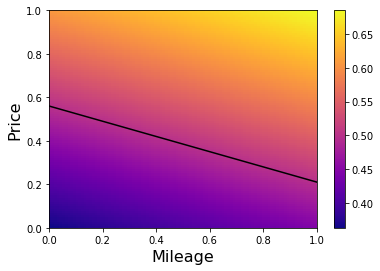

In [171]:
scalar_field_heatmap(l, 0, 1,0,1)
# plot_data(scaled_car_data,white=True)
plt.ylabel('Price', fontsize=16)
plt.xlabel('Mileage', fontsize=16)
plot_function(lambda x: 0.56-0.35*x,0,1,c='k')

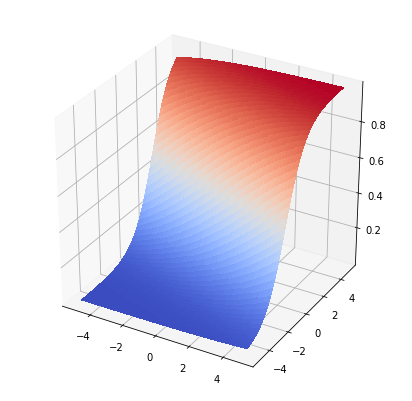

In [172]:
plot_scalar_field(l, -5, 5, -5, 5)
# plot_data(scaled_car_data,white=True)
# plt.ylabel('Price', fontsize=16)
# plt.xlabel('Mileage', fontsize=16)
# plot_function(lambda x: 0.56-0.35*x,0,1,c='k')

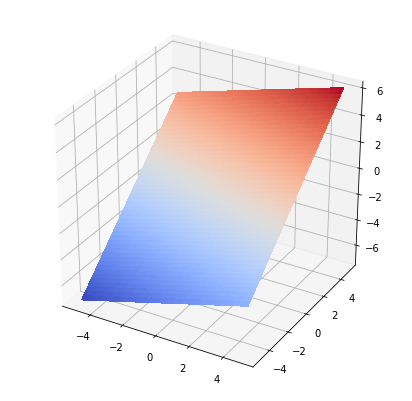

In [173]:
plot_scalar_field(f,-5,5,-5,5)
# plot_scalar_field(lambda x,p: 0,-5,5,-5,5)

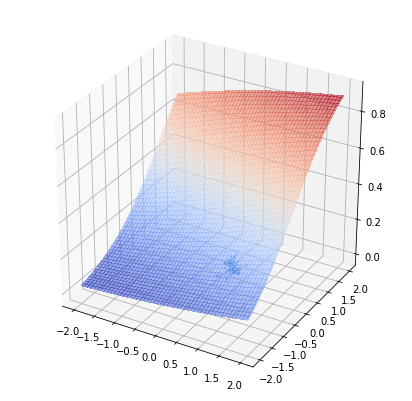

In [174]:
plot_scalar_field(l, -2, 2, -2, 2,alpha=0.5)
plt.scatter([c[0] for c in scaled_car_data],[c[1] for c in scaled_car_data],[c[2] for c in scaled_car_data])
# plt.gca().scatter([0],[0],[0.5])
# plt.ylabel('Price', fontsize=16)
# plt.xlabel('Mileage', fontsize=16)
# plot_function(lambda x: 0.56-0.35*x,0,1,c='k')

In [175]:
scaled_car_data

[(0.3873793103448276, 0.35276804897430614, 1),
 (0.4878735632183908, 0.35265032227683435, 1),
 (0.39156896551724135, 0.3522677105100509, 1),
 (0.11941379310344828, 0.37042705359507905, 1),
 (0.1557816091954023, 0.6029667127762899, 1),
 (0.1882816091954023, 0.6764870353474409, 1),
 (0.47595402298850575, 0.6749860199546752, 1),
 (0.31666666666666665, 0.35265032227683435, 1),
 (0.367816091954023, 0.18798010418812727, 1),
 (0.2449022988505747, 0.38208199664478915, 1),
 (0.39080459770114945, 0.29378697354092476, 1),
 (0.382183908045977, 0.26435529917296996, 1),
 (0.4947183908045977, 0.29378697354092476, 1),
 (0.4547183908045977, 0.2792182947287871, 1),
 (0.3793103448275862, 0.0, 1),
 (0.4709942528735632, 0.32333637460635134, 1),
 (0.1724137931034483, 0.4998086941166083, 1),
 (0.432132183908046, 0.4970126850516526, 1),
 (0.22048850574712645, 0.44103364040380255, 1),
 (0.22988505747126436, 0.23507078317685492, 1),
 (0.291235632183908, 0.3086499690967419, 1),
 (0.38514367816091954, 0.411513671

In [478]:
from random import random

fake_data = []

for i in range(0,50):
    x = random()
    y = random()
    fake_data.append((x,y,x+y>1))

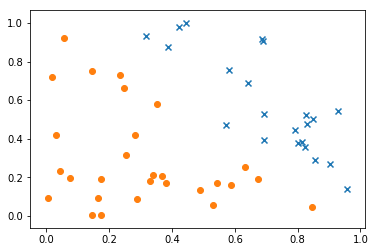

In [480]:
plot_data(fake_data)
# plt.plot([0.6,0.6],[0,1],c='k')

In [183]:
def make_logistic(a,b,c):
    def l(x,p):
        return sigmoid(a*x + b*p - c)
    return l

In [265]:
def simple_logistic_cost(a,b,c):
    l = make_logistic(a,b,c)
    errors = [abs(is_bmw-l(x,p)) 
              for x,p,is_bmw in scaled_car_data]
    return sum(errors)

from math import log
def point_cost(l,x,p,is_bmw):
    wrong = 1 - is_bmw
    return -log(abs(wrong - l(x,p)))

def logistic_cost(a,b,c):
    l = make_logistic(a,b,c)
    errors = [point_cost(l,x,p,is_bmw) 
              for x,p,is_bmw in scaled_car_data]
    return sum(errors)
    

In [315]:
def plot_line(acoeff,bcoeff,ccoeff,**kwargs):
    a,b,c = acoeff, bcoeff, ccoeff
    if b == 0:
        plt.plot([c/a,c/a],[0,1])
    else:
        def y(x):
            return (c-a*x)/b
        plt.plot([0,1],[y(0),y(1)],**kwargs)

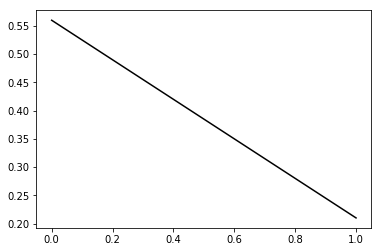

In [311]:
plot_decision_boundary(0.35,1,0.56)

In [239]:
simple_logistic_cost(0.35,1,0.56)

95.81988003779519

In [240]:
simple_logistic_cost(1,1,1)

96.85971575176472

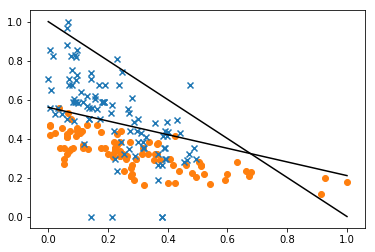

In [281]:
plot_data(scaled_car_data)
plot_line(0.35,1,0.56)
plot_line(1,1,1)

In [458]:
from vectors import length 

def secant_slope(f,xmin,xmax):
    return (f(xmax) - f(xmin)) / (xmax - xmin)

def approx_derivative(f,x,dx=1e-6):
    return secant_slope(f,x-dx,x+dx)

def approx_gradient3(f,x0,y0,z0,dx=1e-6):
    partial_x = approx_derivative(lambda x:f(x,y0,z0),x0,dx=dx)
    partial_y = approx_derivative(lambda y:f(x0,y,z0),y0,dx=dx)
    partial_z = approx_derivative(lambda z:f(x0,y0,z),z0,dx=dx)
    return (partial_x,partial_y,partial_z)

def gradient_descent3(f,xstart,ystart,zstart,tolerance=1e-6,max_steps=1000):
    x = xstart
    y = ystart
    z = zstart
    grad = approx_gradient3(f,x,y,z)
    steps = 0
    while length(grad) > tolerance and steps < max_steps:
        x -= 0.01 * grad[0]
        y -= 0.01 * grad[1]
        z -= 0.01 * grad[2]
        grad = approx_gradient3(f,x,y,z)
        steps += 1
    print(steps)
    return x,y,z

In [306]:
gradient_descent3(logistic_cost,1,1,1,max_steps=5)

5


(0.8810516700599226, 1.493186473025965, 0.8087557885604597)

In [301]:
gradient_descent3(logistic_cost,1,1,1,max_steps=2000)

2000


(3.654777063702484, 11.307339975103668, 5.535181953576507)

In [302]:
gradient_descent3(logistic_cost,1,1,1,max_steps=4000)

4000


(3.7154406197924676, 11.419723416407537, 5.59562135020218)

In [303]:
gradient_descent3(logistic_cost,1,1,1,max_steps=8000)

7244


(3.7167003153580045, 11.422062409195114, 5.596878367305919)

In [304]:
gradient_descent3(logistic_cost,1,1,1,max_steps=16000)

7244


(3.7167003153580045, 11.422062409195114, 5.596878367305919)

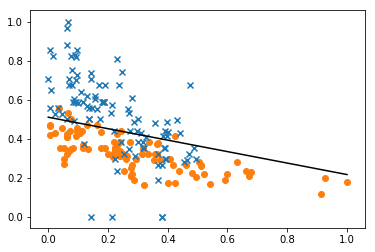

In [244]:
plot_data(scaled_car_data)
plot_decision_boundary(11.572277809293382, 39.34413640128615, 20.046651459794774)

In [248]:
gradient_descent3(logistic_cost,1,1,1,max_steps=8000)

(3.7167003153580045, 11.422062409195114, 5.596878367305919)

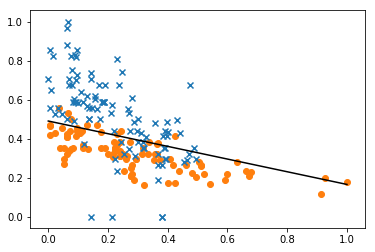

In [249]:
plot_data(scaled_car_data)
plot_decision_boundary(3.7167003153580045, 11.422062409195114, 5.596878367305919)

In [250]:
logistic_cost(1,1,1)

135.56446830870456

In [251]:
logistic_cost(0.35,1,0.56)

130.92490748700456

In [252]:
logistic_cost(3.7167003153580045, 11.422062409195114, 5.596878367305919)

101.95098805651267

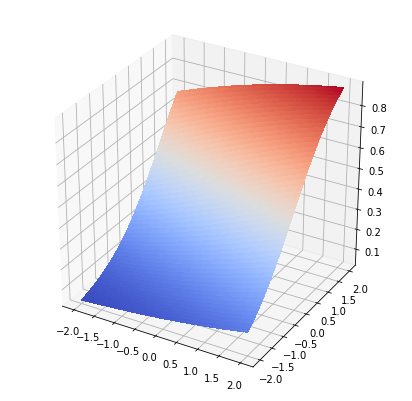

In [345]:
plot_scalar_field(make_logistic(0.35,1,0.56), -2, 2, -2, 2)
# plt.gca().plot([0,1], [0.5,0.1], [0,0], c='k', linestyle='dashed',zorder=3)

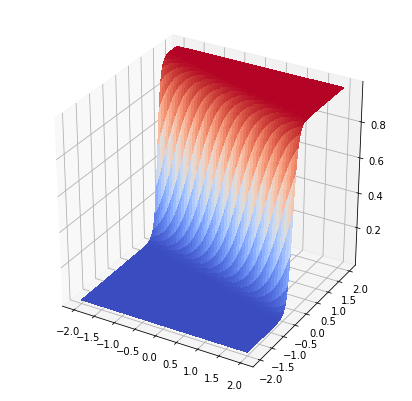

In [346]:
plot_scalar_field(make_logistic(3.7167003153580045, 11.422062409195114, 5.596878367305919), -2, 2, -2, 2)

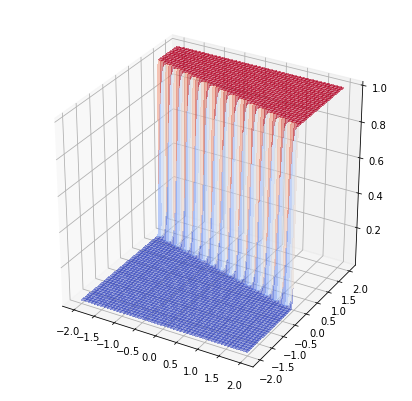

In [258]:
plot_scalar_field(make_logistic(30, 100, 56), -2, 2, -2, 2,alpha=0.5)

In [273]:
-log(0.01)

4.605170185988091

In [275]:
-log(0.001)

6.907755278982137

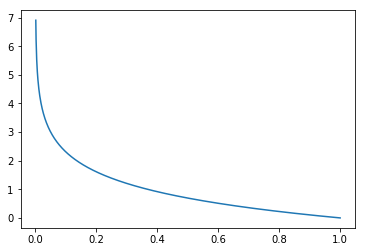

In [266]:
plot_function(lambda x: -log(x), 0.001,1)

In [276]:
-log(1)

-0.0

In [283]:
def best_logistic_classifier(x,p):
    l = make_logistic(3.7167003153580045, 11.422062409195114, 5.596878367305919)
    if l(x,p) > 0.5:
        return 1
    else:
        return 0

In [285]:
test_classifier(best_logistic_classifier,scaled_car_data)

true positives 73.000000
true negatives 87.000000
false positives 13.000000
false negatives 27.000000


0.8

0
100
200
300
400
500
600
700
800
900


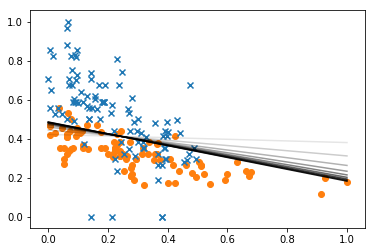

In [316]:
plot_data(scaled_car_data)
for i in range(0,1000,100):
    a,b,c = gradient_descent3(logistic_cost,1,1,1,max_steps=i)
    plot_line(a,b,c,alpha=i/1000,c='k')
    

In [321]:
gradient_descent3(logistic_cost,1,1,1,max_steps=8000)

7244


(3.7167003153580045, 11.422062409195114, 5.596878367305919)

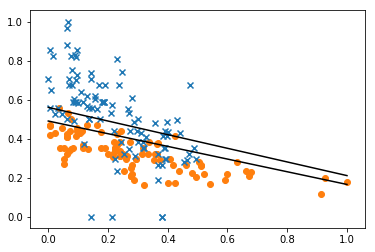

In [326]:
plot_data(scaled_car_data)
plot_line(0.35,1,0.56,c='k')
plot_line(3.7167003153580045, 11.422062409195114, 5.596878367305919,c='k')


In [353]:
def constant_price_classifier(cutoff_price):
    def c(x,p):
        if p > cutoff_price:
            return 1
        else:
            return 0
    return c
    

In [354]:
all_prices = [c[1] for c in all_car_data]

In [355]:
def cutoff_accuracy(cutoff_price):
    c = constant_price_classifier(cutoff_price)
    return test_classifier(c,all_car_data)

In [356]:
max(all_prices,key=cutoff_accuracy)

true positives 76.000000
true negatives 67.000000
false positives 33.000000
false negatives 24.000000
true positives 77.000000
true negatives 66.000000
false positives 34.000000
false negatives 23.000000
true positives 80.000000
true negatives 59.000000
false positives 41.000000
false negatives 20.000000
true positives 75.000000
true negatives 70.000000
false positives 30.000000
false negatives 25.000000
true positives 29.000000
true negatives 100.000000
false positives 0.000000
false negatives 71.000000
true positives 19.000000
true negatives 100.000000
false positives 0.000000
false negatives 81.000000
true positives 22.000000
true negatives 100.000000
false positives 0.000000
false negatives 78.000000
true positives 77.000000
true negatives 66.000000
false positives 34.000000
false negatives 23.000000
true positives 95.000000
true negatives 8.000000
false positives 92.000000
false negatives 5.000000
true positives 73.000000
true negatives 73.000000
false positives 27.000000
false ne

17998.0

In [359]:
test_classifier(constant_price_classifier(17998.0),all_car_data)

true positives 62.000000
true negatives 97.000000
false positives 3.000000
false negatives 38.000000


0.795

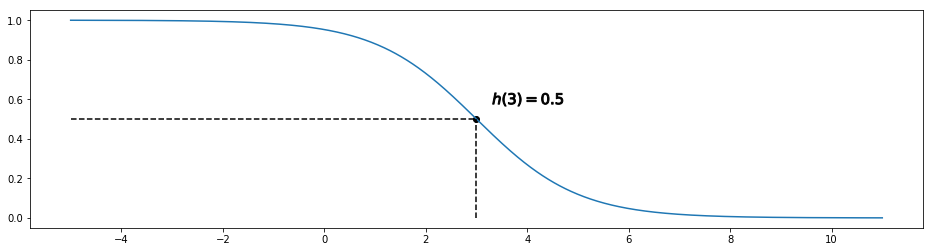

In [378]:
plot_function(lambda x:sigmoid(3-x),-5,11)
plt.plot([3,3],[0,0.5],linestyle='dashed',c='k')
plt.plot([-5,3],[0.5,0.5],linestyle='dashed',c='k')
plt.scatter([3],[0.5],c='k')
plt.scatter([4],[0.6],marker='$h(3)=0.5$',s=5000,c='k')
plt.gcf().set_size_inches(16,4)

<Figure size 504x504 with 0 Axes>

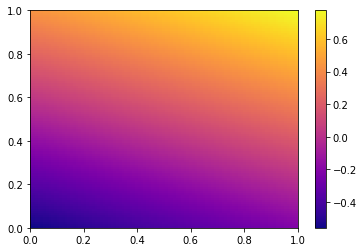

In [379]:
scalar_field_heatmap(f,0,1,0,1)

In [380]:
sigmoid(-1)

0.2689414213699951

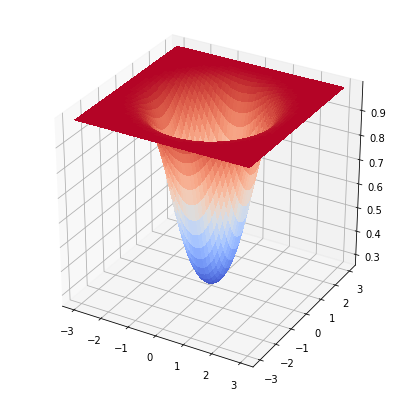

In [381]:
plot_scalar_field(lambda x,y:sigmoid(x*x+y*y-1),-3,3,-3,3)

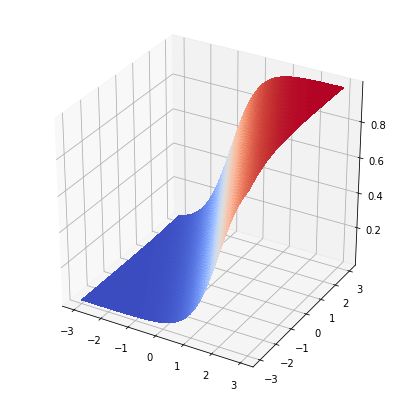

In [385]:
plot_scalar_field(lambda x,y:sigmoid(2*x+y-1),-3,3,-3,3)

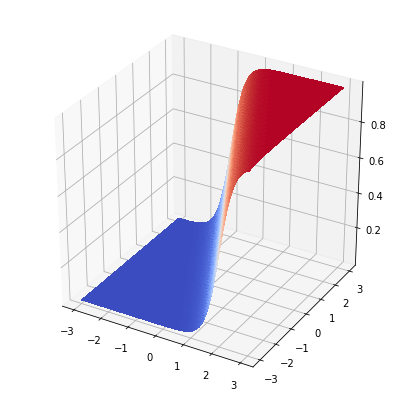

In [386]:
plot_scalar_field(lambda x,y:sigmoid(4*x+2*y-2),-3,3,-3,3)

In [453]:
def partial_derivative(f,i,v,**kwargs):
    def cross_section(x):
        arg = [(vj if j != i else x) for j,vj in enumerate(v)]
        return f(*arg)
    return approx_derivative(cross_section, v[i], **kwargs)

def approx_gradient(f,v,dx=1e-6):
    return [partial_derivative(f,i,v) for i in range(0,len(v))]

def gradient_descent(f,vstart,tolerance=1e-6,max_steps=1000):
    v = vstart
    grad = approx_gradient(f,v)
    steps = 0
    while length(grad) > tolerance and steps < max_steps:
        v = [(vi - 0.01 * dvi) for vi,dvi in zip(v,grad)]
        grad = approx_gradient(f,v)
        steps += 1
    return v

In [454]:
def sum_squares(*v):
    return sum([(x-1)**2 for x in v])
        

In [455]:
v = [2,2,2,2,2]
v

[2, 2, 2, 2, 2]

In [456]:
approx_gradient(sum_squares,v)

[2.0000000002220446,
 2.0000000002220446,
 2.0000000002220446,
 2.0000000002220446,
 2.0000000002220446]

In [457]:
gradient_descent(sum_squares,v)

[1.0000002235452137,
 1.0000002235452137,
 1.0000002235452137,
 1.0000002235452137,
 1.0000002235452137]

In [460]:
gradient_descent3(simple_logistic_cost,1,1,1, max_steps=1000)

1000


(2.0150477575710815, 16.734656030348358, 8.092075209684426)

In [461]:
gradient_descent3(simple_logistic_cost,1,1,1, max_steps=2000)

2000


(5.265502280754554, 22.81979340051681, 11.448130040583395)

In [462]:
gradient_descent3(simple_logistic_cost,1,1,1, max_steps=4000)

4000


(8.439443751165298, 30.39030257821185, 15.45219386183039)

In [470]:
gradient_descent3(simple_logistic_cost,1,1,1, max_steps=16000)

16000


(14.97300714350473, 49.93692187003776, 25.409305078592283)

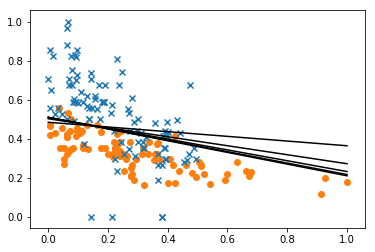

In [472]:
plot_data(scaled_car_data)
plot_line(2.0150477575710815, 16.734656030348358, 8.092075209684426, c='k')
plot_line(5.265502280754554, 22.81979340051681, 11.448130040583395, c='k')
plot_line(8.439443751165298, 30.39030257821185, 15.45219386183039, c='k')
plot_line(11.572277809293382, 39.34413640128615, 20.046651459794774, c='k')
plot_line(14.97300714350473, 49.93692187003776, 25.409305078592283, c='k')

In [473]:
def logistic_cost(a,b,c):
    l = make_logistic(a,b,c)
    errors = [point_cost(l,x,p,is_bmw) 
              for x,p,is_bmw in scaled_car_data]
    return sum(errors)

In [474]:
def fake_data_logistic_cost(a,b,c):
    l = make_logistic(a,b,c)
    errors = [point_cost(l,x,p,is_true) 
              for x,p,is_true in fake_data]
    return sum(errors)

0


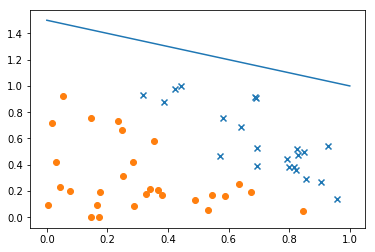

In [483]:
a,b,c = gradient_descent3(fake_data_logistic_cost,1,2,3,4000)
plot_line(a,b,c)
plot_data(fake_data)

In [484]:
def test_fnc(x,y,z,
            w):
    return 1

In [485]:
test_fnc(1,2,3,4)

1